# Metadata

```yaml
Course:   DS 5001
Module:   10 Lab
Topic:    Word Shift Graphs
Author:   R.C. Alvarado
Date:     02 April 2023 (revised)
```

- See https://ryanjgallagher.github.io/code/word_shift/overview and https://shifterator.readthedocs.io/en/latest/
- See also SocialSent lexicon https://nlp.stanford.edu/projects/socialsent/

# Set Up

In [1]:
data_path = "../data"
corpus_prefix = 'austen-melville'

In [2]:
import pandas as pd
import shifterator as sh

# Get Data

In [3]:
SALEX = pd.read_csv(f"{data_path}/lexicons/salex_nrc.csv").set_index('term_str')

In [4]:
# SALEX

In [5]:
BOW = pd.read_csv(f"{data_path}/output/{corpus_prefix}-BOW.csv").set_index(['book_id','chap_num','term_str'])

In [6]:
# BOW

In [7]:
LIB = pd.read_csv(f"{data_path}/output/{corpus_prefix}-LIB_FIXED.csv").set_index(['book_id'])
LIB['author_id'] = LIB.author.str.split(', ').str[0]
LIB['book_label'] = LIB.author_id + ' ' + LIB.index.astype('str') + ': ' + LIB.title.str[:20]

In [8]:
# LIB

# Combine Tables

In [9]:
AUTH = BOW.join(LIB.author_id, on='book_id').groupby(['author_id','term_str']).agg({'n':'sum', 'tfidf':'mean'}).join(SALEX.nrc_sentiment, on='term_str').dropna()

In [10]:
AUTH['sent_weight'] = AUTH['n'] * AUTH['tfidf'] * AUTH['nrc_sentiment']

In [11]:
# AUTH['sent_weight'] = AUTH['tfidf'] * AUTH['nrc_sentiment']

In [12]:
AUTH.loc['AUSTEN']

,n,tfidf,nrc_sentiment,sent_weight
term_str,,,,
abandoned,5,0.001951,-1.0,-0.009756
abhor,7,0.008680,-1.0,-0.060757
abhorrent,2,0.003221,-1.0,-0.006443
abolish,1,0.001692,-1.0,-0.001692
abominable,18,0.002996,-1.0,-0.053926
...,...,...,...,...
yearning,2,0.002285,0.0,0.000000
young,827,0.001573,1.0,1.300636
youth,66,0.002152,1.0,0.142024


# Frequency Shifts

/Users/rca2t1/anaconda3/envs/eta/lib/python3.8/site-packages/shifterator/plotting.py:604: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_ticks, fontsize=plot_params["xtick_fontsize"])


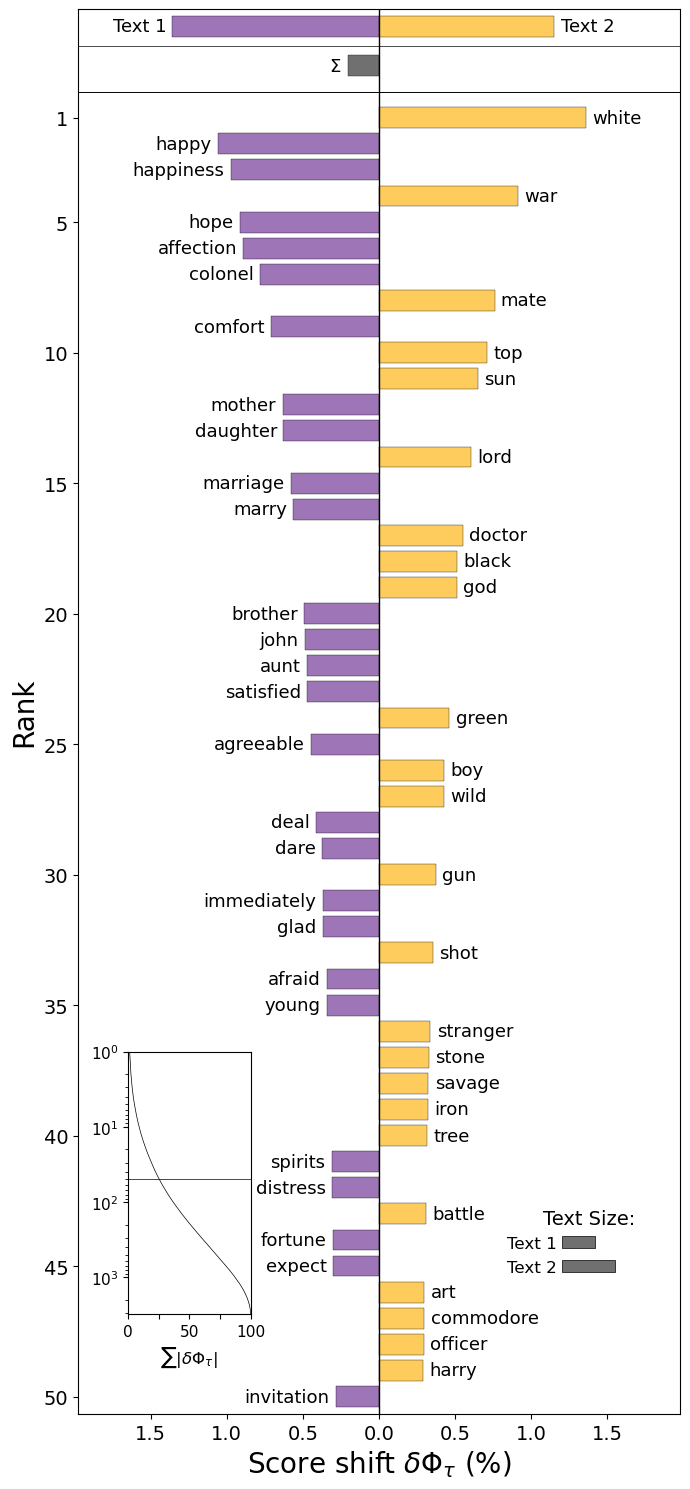

<AxesSubplot:xlabel='Score shift $\\delta \\Phi_{\\tau}$ (%)', ylabel='Rank'>

In [13]:
sh.JSDivergenceShift(AUTH.loc['AUSTEN', 'n'].to_dict(), 
                     AUTH.loc['MELVILLE', 'n'].to_dict()).get_shift_graph()

In [14]:
# sh.ProportionShift(v_austen, v_melville).get_shift_graph()

In [15]:
sh.EntropyShift(v_austen, v_melville).get_shift_graph()

NameError: name 'v_austen' is not defined

In [ ]:
# sh.Shift

In [ ]:
FREQ = AUTH.n.unstack().T.dropna()

In [ ]:
FREQ

In [ ]:
SENT = AUTH.nrc_sentiment.unstack().T.dropna()

In [ ]:
SENT

In [ ]:
SENTW = AUTH.sent_weight.unstack().T.dropna()

In [ ]:
SENTW

In [ ]:
sh.Shift(
    FREQ['AUSTEN'].to_dict(), 
    FREQ['MELVILLE'].to_dict(), 
    SENT['AUSTEN'].to_dict(), 
    SENT['MELVILLE'].to_dict()).get_shift_graph()

In [ ]:
sh.Shift(
    FREQ['AUSTEN'].to_dict(), 
    FREQ['MELVILLE'].to_dict(), 
    SENTW['AUSTEN'].to_dict(), 
    SENTW['MELVILLE'].to_dict()).get_shift_graph()

# Topics

In [ ]:
PHI = pd.read_csv(f"{data_path}-LDA_PHI-40.csv").set_index('topic_id').T
PHI.index.name = 'term_str'

In [ ]:
PHI['TSUM'] = PHI.sum(1)

In [ ]:
PHIP = PHI / PHI.sum()

In [ ]:
PHIP.TSUM

In [ ]:
def plot_shift(v1, v2):
    sh.EntropyShift(PHIP[v1].to_dict(), PHIP[v2].to_dict()).get_shift_graph()

In [ ]:
plot_shift('T23', 'T05')